In [1]:
import numpy as np
import glob
from pathlib import Path
import json
import pandas as pd

In [2]:
# analyse for /log/100000
log_dir = Path('./log/100000/')
logs = glob.glob(str(log_dir / '*.json'))
proj_sizes = []
ensem_sizes = []
iters = []
for log in logs:
    with open(log, 'r') as rf:
        logfile = json.load(rf)
        iters.append(logfile['iteration'])
        proj_sizes.append(logfile['projection_size'])
        ensem_sizes.append(logfile['ensemble_size'])
        rf.close()

zip_it = zip(proj_sizes, ensem_sizes, (max(x) for x in iters), (sum(x)/len(x) for x in iters))  # proj ensem max_it mean_it
dict_it = {(proj_size, ensem_size): (max_val, avg_val) for proj_size, ensem_size, max_val, avg_val in zip_it}
# df = pd.DataFrame({'proj_size':proj_sizes, 'ensem_size':ensem_sizes, 'iter':iters})
# df = df.sort_values(by=['proj_size','ensem_size'])

In [2]:
log_dir = './log/10000/'
max_it = []
mean_it = []
proj_sizes = []
ensem_sizes = []
for i in range(8,17):
    for j in range(10, 21):
        logs = glob.glob(log_dir + f'proj_size_{i}_ensem_size_{j}*')
        iters = []
        for log in logs:
            with open(log, 'r') as rf:
                logfile = json.load(rf)
                iters.append(logfile['iteration'])
                rf.close()
                
        max_its = [max(x) for x in iters]
        mean_its = [sum(x) / len(x) for x in iters]
        
        max_it.append(sum(max_its) / len(max_its))
        mean_it.append(sum(mean_its) / len(mean_its))
        proj_sizes.append(i)
        ensem_sizes.append(j)
zip_it = zip(proj_sizes, ensem_sizes, max_it, mean_it)  # proj ensem max_it mean_it
dict_it = {(proj_size, ensem_size): (max_val, avg_val) for proj_size, ensem_size, max_val, avg_val in zip_it}

(        10      11      12      13      14      15      16      17      18  \
 8   169564    3940   52120   92736   24047   93603   62228   52921  151695   
 9    59330   87781   48202   75678    3432   81186    5764  248883   81139   
 10  150241  132145  146119   11251  112651  178723   78992   90523   31050   
 11   38568    2924  100859   26979  105084  111640   71603  209548   64999   
 12  160673   15956   37686   69224  112135   19661   56707   41792   58477   
 13  113394  157197   73831  106185   62568   59181   30528  171710  216863   
 14  121272  105147   17082  169296  121868    8640   30322  201406   38237   
 15    7394  142727    2704  133100   21634   79569  236031    9710    5938   
 16  199329    2647   38051   11200  142905   63401  172658   81090  118241   
 
         19      20  
 8   183588   47548  
 9    25502   96791  
 10  108221   55075  
 11  278499   90222  
 12   29535   76717  
 13   83379   62808  
 14    5567   19089  
 15    1854  112131  
 16  11539

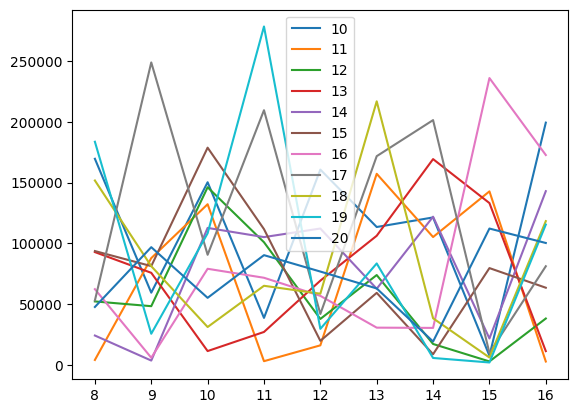

In [3]:
df = pd.DataFrame(columns=sorted(set(ensem_sizes)), index=sorted(set(proj_sizes)))
for i in proj_sizes:
    for j in ensem_sizes:
        df.at[i, j] = dict_it[i, j][0]
    # df.at[ensem_sizes[index], i] = iters[index]
    # df.at[i, ensem_sizes[index]] = max_it[index]
    # index +=1
df, df.plot()

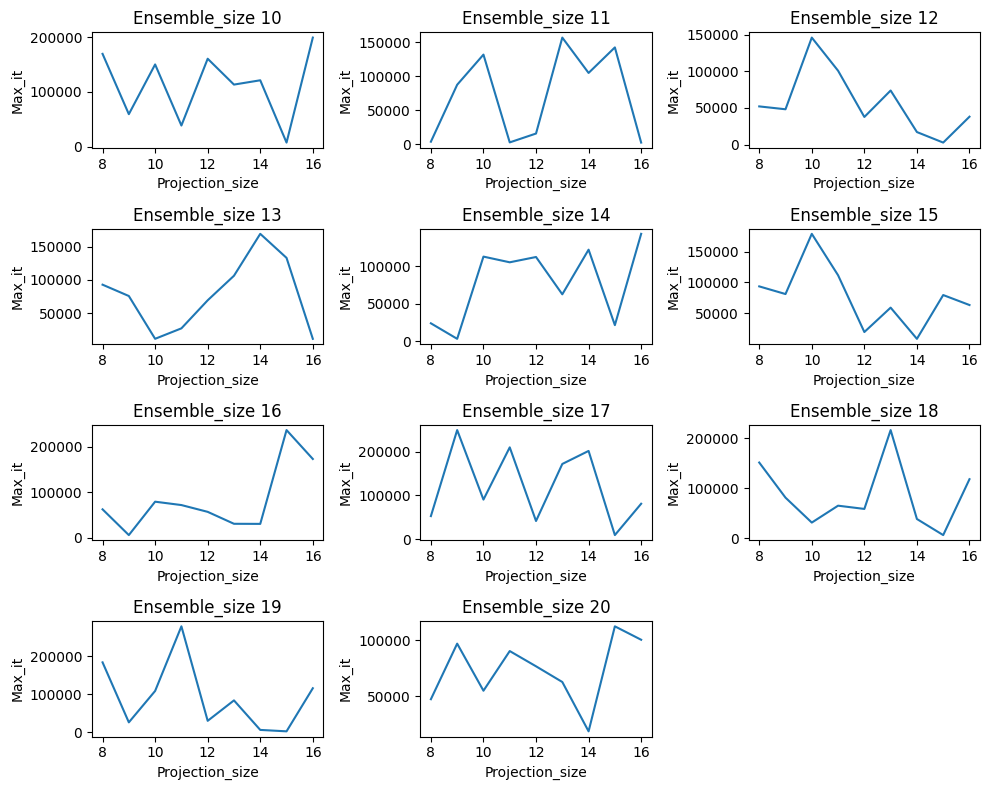

In [4]:
import matplotlib.pyplot as plt

num_columns = 3
num_rows = (len(df.columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5) 

for i, column in enumerate(df.columns):
    row_index = i // num_columns
    col_index = i % num_columns
    ax = axes[row_index, col_index]
    
    df[column].plot(ax=ax)
    
    ax.set_title(f'Ensemble_size {column}')
    ax.set_xlabel('Projection_size')
    ax.set_ylabel('Max_it')

for i in range(len(df.columns), num_columns * num_rows):
    row_index = i // num_columns
    col_index = i % num_columns
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

<Axes: >

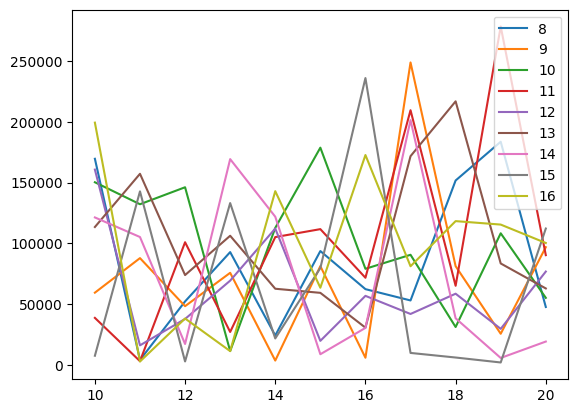

In [5]:
df_t = df.T
df_t.plot()

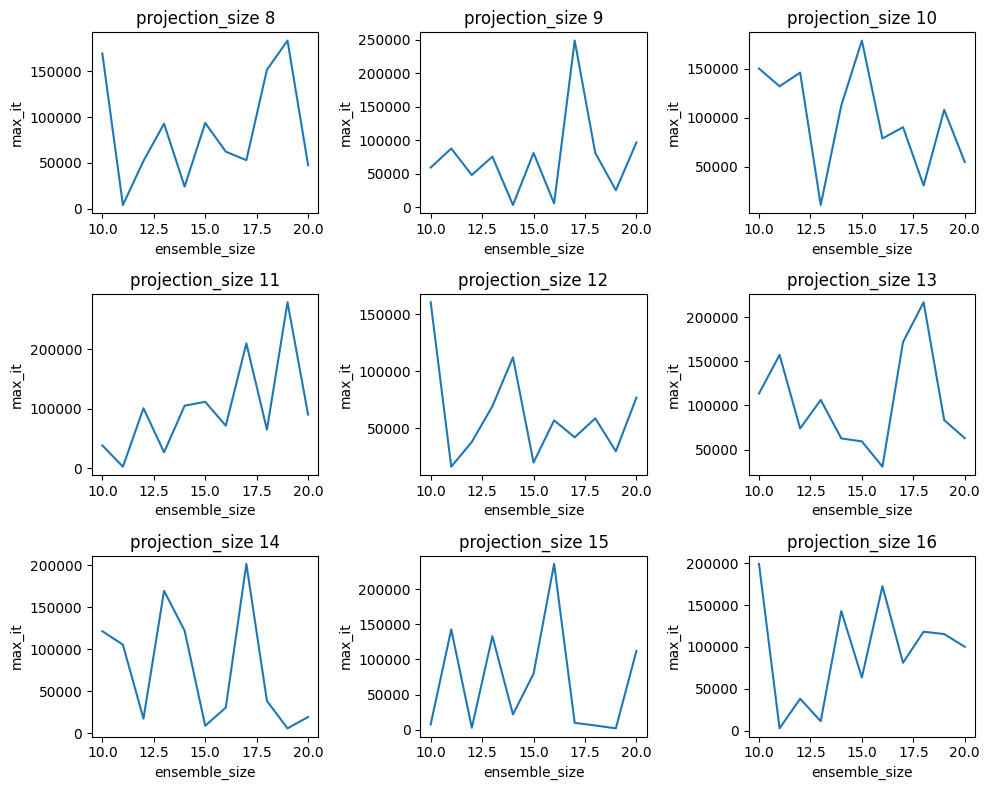

In [6]:
num_columns = 3
num_rows = (len(df_t.columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5) 

for i, column in enumerate(df_t.columns):
    row_index = i // num_columns
    col_index = i % num_columns
    ax = axes[row_index, col_index]
    
    df_t[column].plot(ax=ax)
    
    ax.set_title(f'projection_size {column}')
    ax.set_xlabel('ensemble_size')
    ax.set_ylabel('max_it')

for i in range(len(df_t.columns), num_columns * num_rows):
    row_index = i // num_columns
    col_index = i % num_columns
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

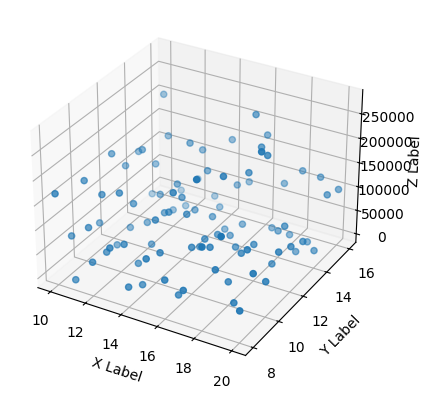

In [21]:
from mpl_toolkits.mplot3d import Axes3D

x = df.columns.astype(float)
y = df.index.astype(float)
X, Y = np.meshgrid(x, y)
Z = df.values.astype(float)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.mouse_init()

plt.show()

In [22]:
print(proj_sizes)
print(ensem_sizes)
print(max_it)
print(mean_it)

[9, 10, 16, 16, 12, 8, 14, 9, 9, 12, 12, 11, 9, 13, 10, 11, 8, 16, 11, 15, 12, 15, 11, 14, 9, 13, 13, 13, 9, 16, 8, 10, 12, 9, 12, 10, 14, 11, 8, 8, 15, 10, 12, 10, 10, 11, 16, 8, 14, 14, 16, 15, 9, 13, 14, 15, 15, 10, 16, 8, 14, 11, 14, 10, 11, 12, 13, 8, 13, 11, 15, 9, 14, 9, 15, 16, 16, 15, 12, 14, 14, 11, 9, 15, 10, 16, 12, 13, 10, 8, 13, 16, 13, 8, 13, 11, 15, 12, 8]
[13, 16, 11, 18, 14, 10, 15, 17, 18, 18, 17, 11, 19, 12, 18, 12, 14, 14, 16, 17, 19, 13, 10, 20, 10, 18, 11, 16, 15, 12, 17, 10, 20, 14, 11, 11, 12, 13, 15, 12, 14, 19, 13, 12, 20, 20, 17, 11, 10, 19, 15, 16, 12, 20, 14, 11, 20, 15, 13, 13, 16, 19, 11, 14, 15, 12, 14, 18, 13, 17, 15, 11, 18, 16, 18, 20, 19, 12, 15, 17, 13, 14, 20, 10, 17, 10, 16, 15, 13, 20, 19, 16, 10, 19, 17, 18, 19, 10, 16]
[75678, 78992, 2647, 118241, 112135, 169564, 8640, 248883, 81139, 58477, 41792, 2924, 25502, 73831, 31050, 100859, 24047, 142905, 71603, 9710, 29535, 133100, 38568, 19089, 59330, 216863, 157197, 30528, 81186, 38051, 52921, 15024